# Homework 1 (Linear Regression)

# COSC 3337 -  Dr. Rizk

### __About The Data__

The data we'll be using comes from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/wine+quality), and contains the following attributes about red wine:

- fixed acidity
- volatile acidity
- citric acid
- residual sugar
- chlorides
- free sulfur dixoide
- total sulfur dioxide
- density
- pH
- sulphates
- alcohol (%)
- quality

We adjusted the dependent variable, 'quality', to make it a little more continuous.

### __Problem Statement__

Let's say we are part of a data science team that is contracted out as consultants for different companies. In this scenario, we have been assigned a contract with a red wine company which makes a special Cougar Red Blend wine. They have a number of different varieties, each given different quality scores. The wine company has collected different characteristics about their different wines over the years, but they want to know how these variables impact a wine's quality rating. They have no idea what tools to use to do this!

In general, the company would like to know:

- Which variables are significant in predicting the quality of a Cougar Red Blend
- How well those variables describe the quality of the wine

** For the homework assignments, we want you to not only use the tools given in class, but also to be able to _interpret_ the results. There are subjective questions, and the grading will be weighted not necessarily on your conclusion, but how you support your conclusion. To do this, you will need to conceptually understand the methods given in class in order to explain results.

** Also, when trying to mimic our results, yours does not need to look exactly like the one given, as long as it is readable __and__ answers the question convincingly. Adding comments to code with "#" helps us to understand what you did or were trying to do.

** Please turn in a Jupyter notebook containing your code, its output, and your answers with the file name: 

LASTNAME_FIRSTNAME_3337_HW1.ipynb

### __Part 1. Importing Libraries__

Begin by importing the necessary libraries that you'll be using.

Remember, libraries/packages are groups of functions and classes that don't come standard with Python. We are importing these packages so that we can use already-made functions, instead of having to create our own. 

As a tip, remember that if you're struggling to understand a function or how to use it, each of these packages has documentation on its website that explains exactly how to use it with examples. Google is your friend :)

In [169]:
# Data Cleaning and Plotting Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

# Data Analysis Libraries
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

# Sets parameters for the entire notebook for Seaborn/Matplotlib plots
rcParams['figure.figsize'] = 10, 7
rcParams.update({'font.size': 12})
sns.set_style('darkgrid')

# If the above codeblock doesn't run, make sure you have each of
# of the packages installed and you are running Python 3.0 or greater

### __Part 2. Reading and Understanding the Data__ ###

Import the data using Pandas into a dataframe named `wine_df`. Then, display the first 5 rows

In [170]:
### PUT YOUR CODE HERE TO TRY AND MIMIC THE BELOW OUTPUT
# Load the data into a pandas DataFrame
wine_df = pd.read_csv('wine_quality.csv')

# call .head() to return first 5 rows
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.182611
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,4.874886
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,4.755772
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,5.783057
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.199293


Print some basic statistics of the data

In [171]:
### PUT YOUR CODE HERE TO TRY AND MIMIC THE BELOW OUTPUT
# call describe() to get a better sense of the data
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.638044
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.818458
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,2.948026
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.017043
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,5.786944
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.096932
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.240683


In [172]:
# Also, call .info() to see any missing values
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   float64
dtypes: float64(12)
memory usage: 150.0 KB


Create the correlation matrix using Pandas, then using Seaborn, plot a heatmap of the correlation matrix that looks similar to the one below.

HINT: Look at [Matplotlib color map options](https://matplotlib.org/stable/tutorials/colors/colormaps.html) to see if you can find a good color scheme for your heatmap to make it more understandable, and play around with different values of the seaborn heatmap function

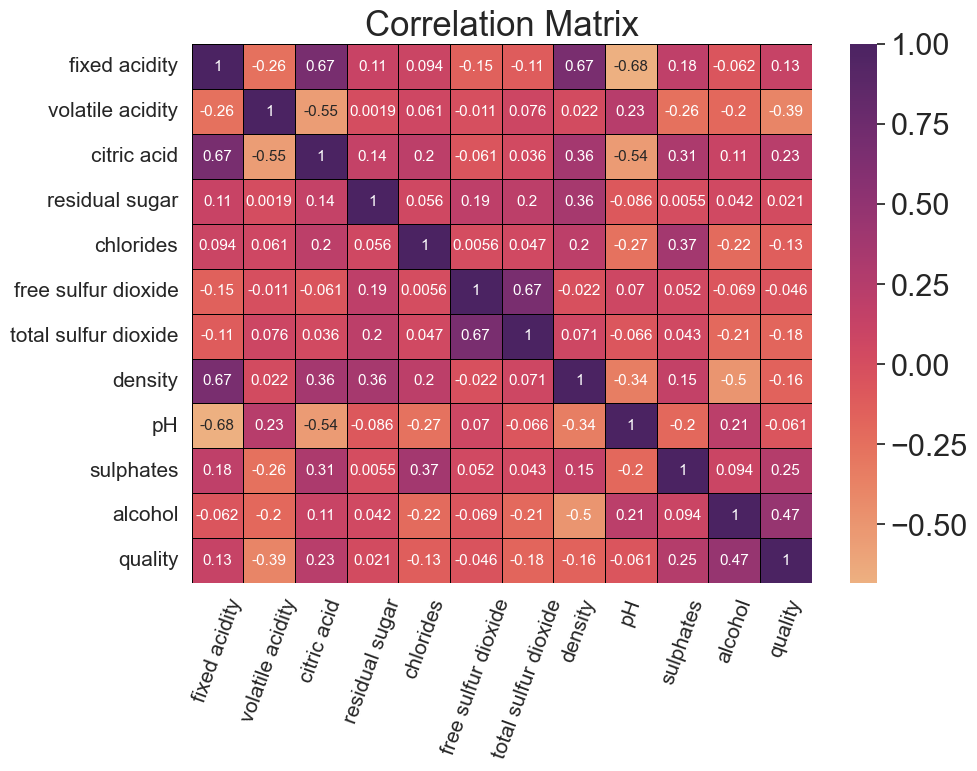

In [173]:
### PUT YOUR CODE HERE TO TRY AND MIMIC THE BELOW OUTPUT
# Create a heatmap of the data
# Add annot_kws = {'size':11} to reduce size and fit in the boxes
# Change color to 'flare' for warm colors like
# Add linewidth = 0.7 and colored black to read the map easily
# Add a title, increase fontsize for x and y labels and add font_scale = 2
# Rotate x labels to 70 for us to read easier
sns.heatmap(wine_df.corr(), annot = True, annot_kws = {'size':11}, cmap = 'flare', linewidths = 0.7, linecolor = "black")
sns.set(font_scale = 2)
plt.title('Correlation Matrix', fontsize = 25)
plt.xticks(fontsize = 15, rotation = 70)
plt.yticks(fontsize = 15)
plt.show()

__Q1__: Does this reveal anything interesting for us? If so, what?

(After each question is a cell that we changed from 'Code' to 'Markdown'. Instead of reading Python code, Jupyter will read these as Markdown blocks, which is a way to code/format text. Here is a [Markdown Basic Guide](https://www.markdownguide.org/basic-syntax/))

After looking at the correlation matrix, I see no severe collinearity because there are no correlation with more than 0.8 between 2 variables. I see that wines with high citric acid tend to have high fixed acidity. High fixed acidity tend to have high density, also large total sulfur dioxide tend to have high free sulfur dioxide. Therefore, I see wines with low pH tend to have low fixed acidity. From this correlation matrix, there is a linear relationship between every 2 variables, since there are no two variables have a correlation of 0. 

Using Seaborn regplots, plot *__each__* feature in the same style as the plot below. (Use a for loop. There should be 11 plots like the one below. Try experimenting with different colors, too!)

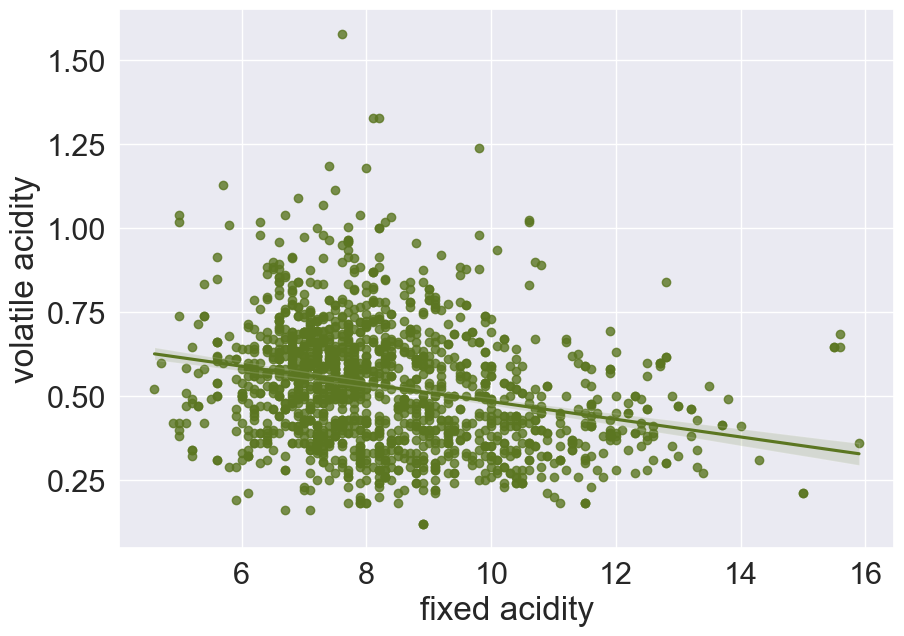

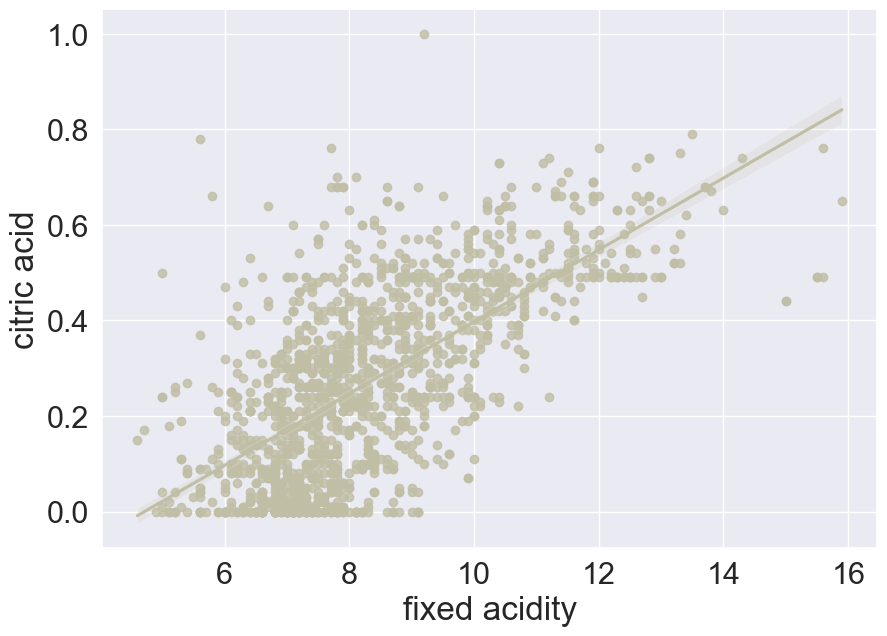

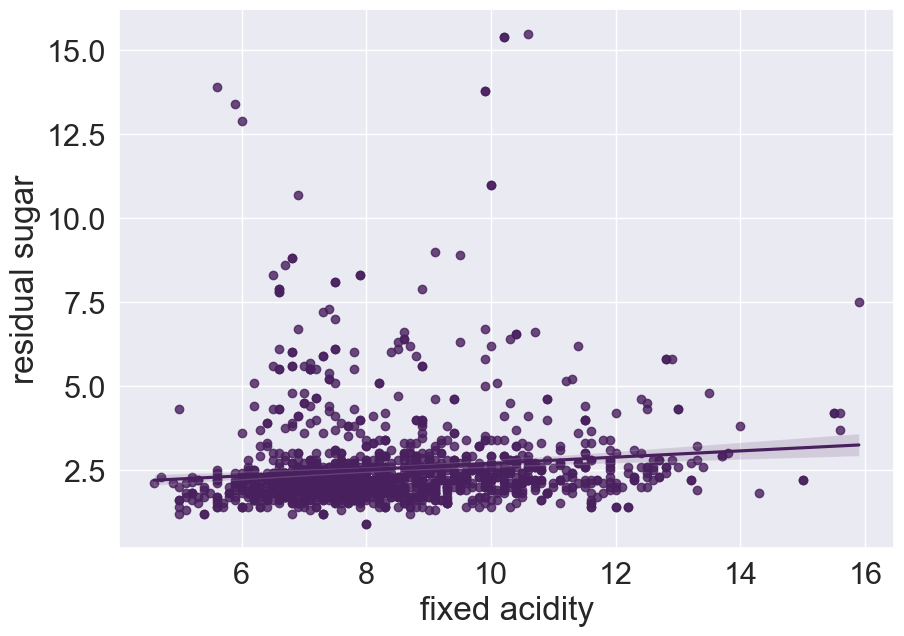

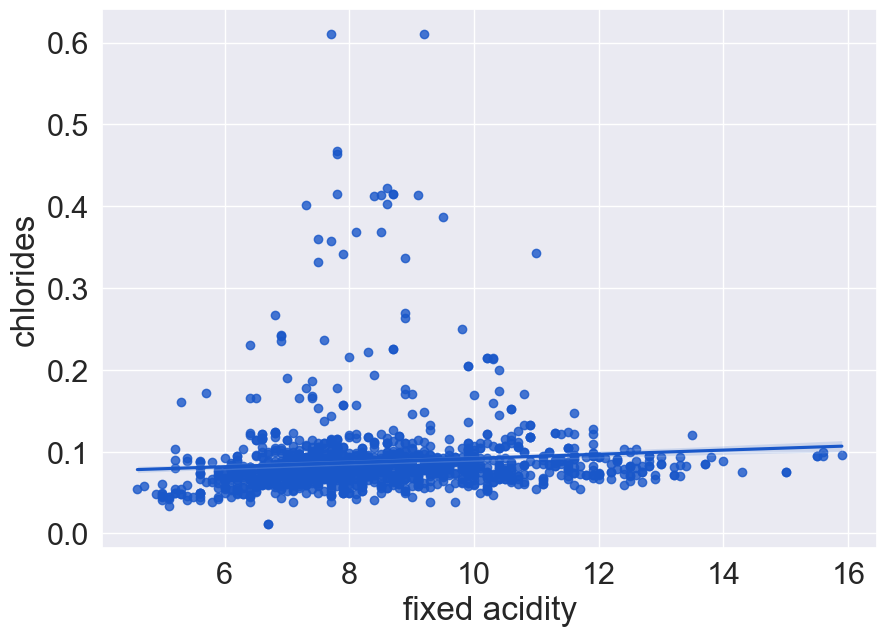

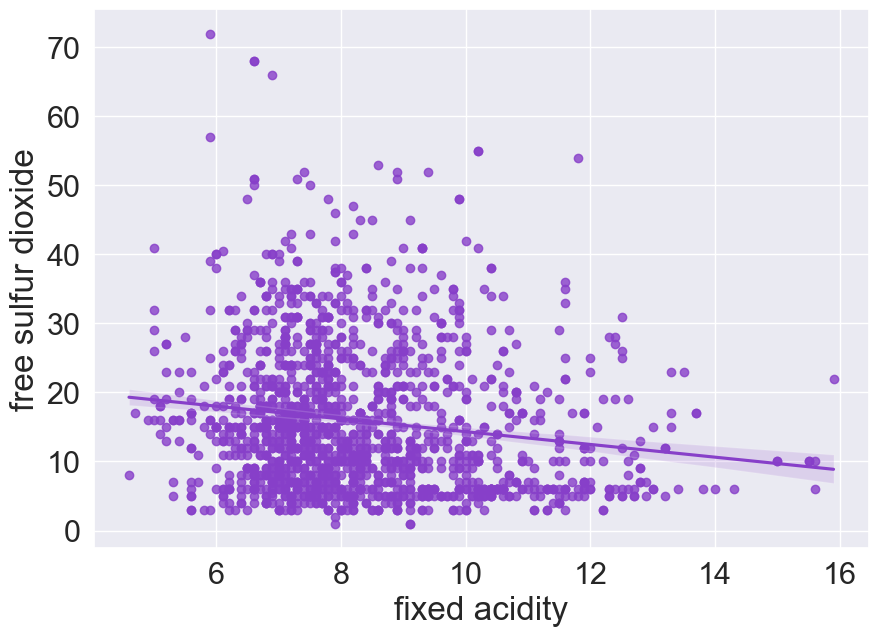

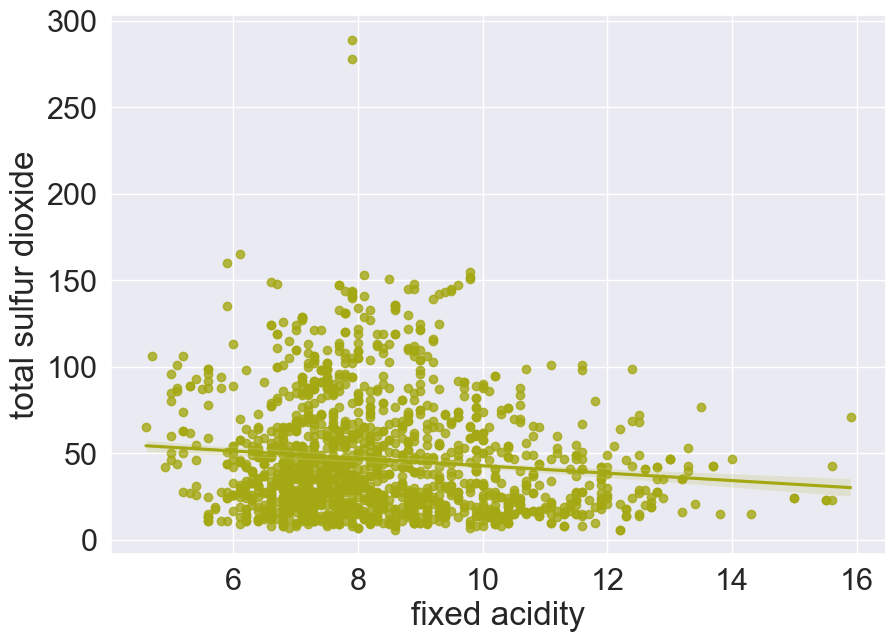

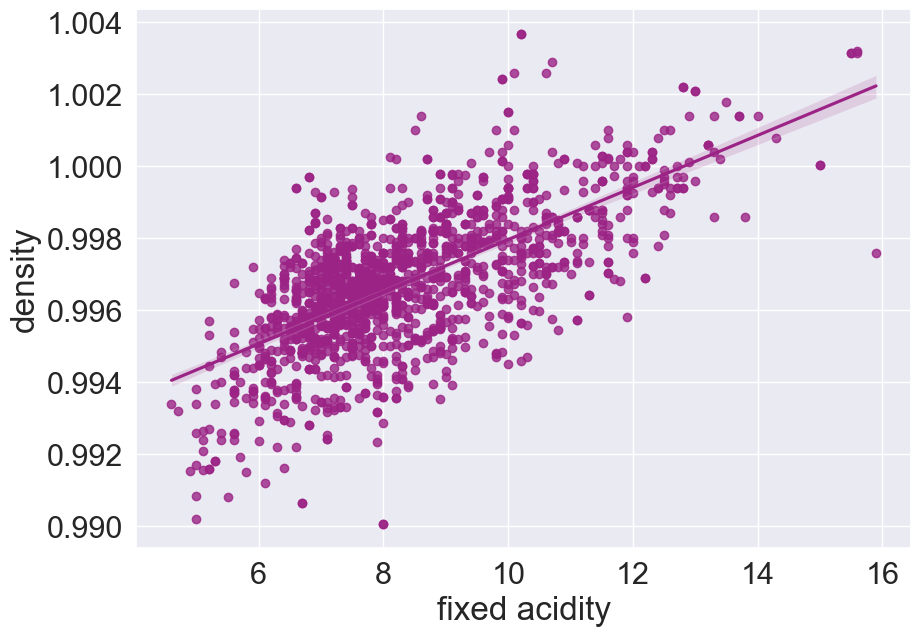

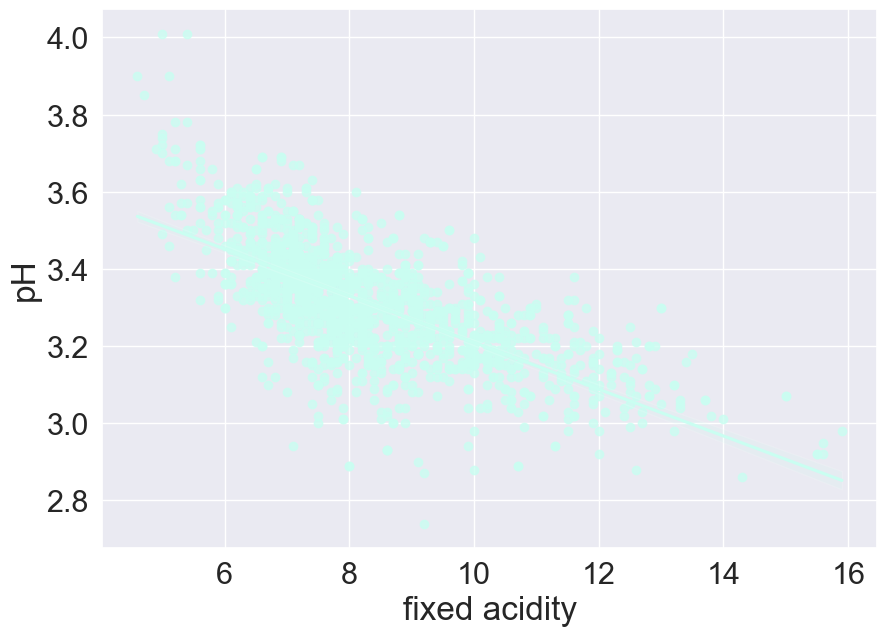

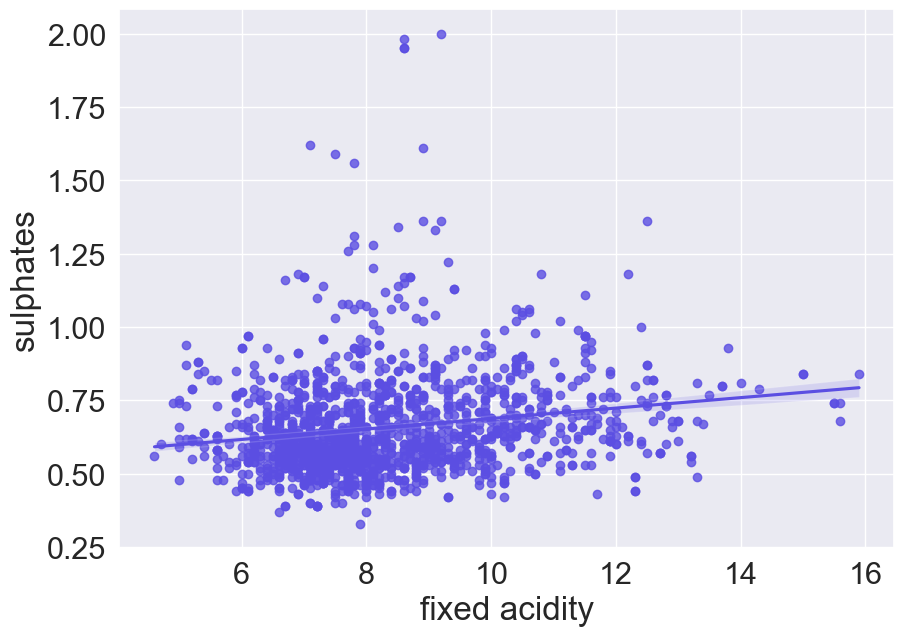

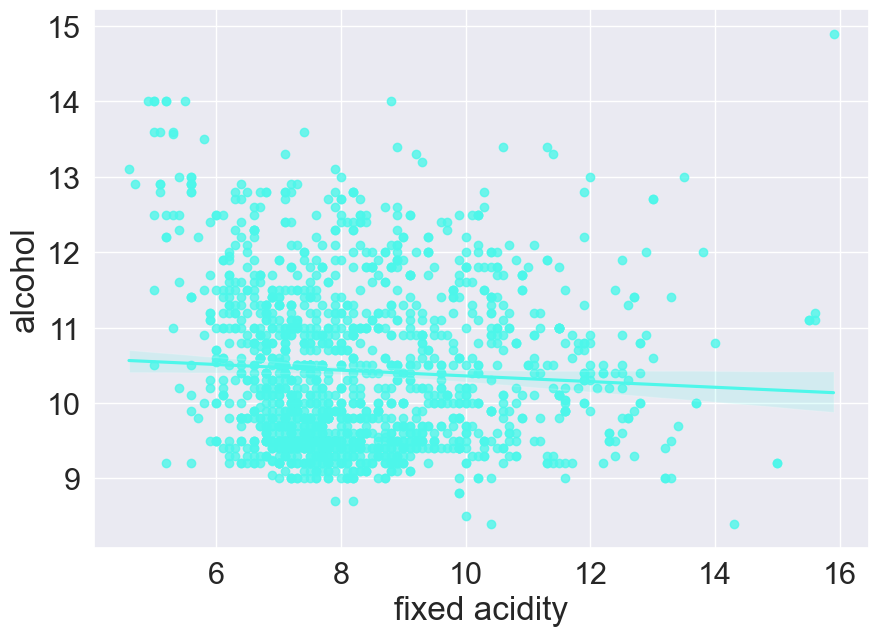

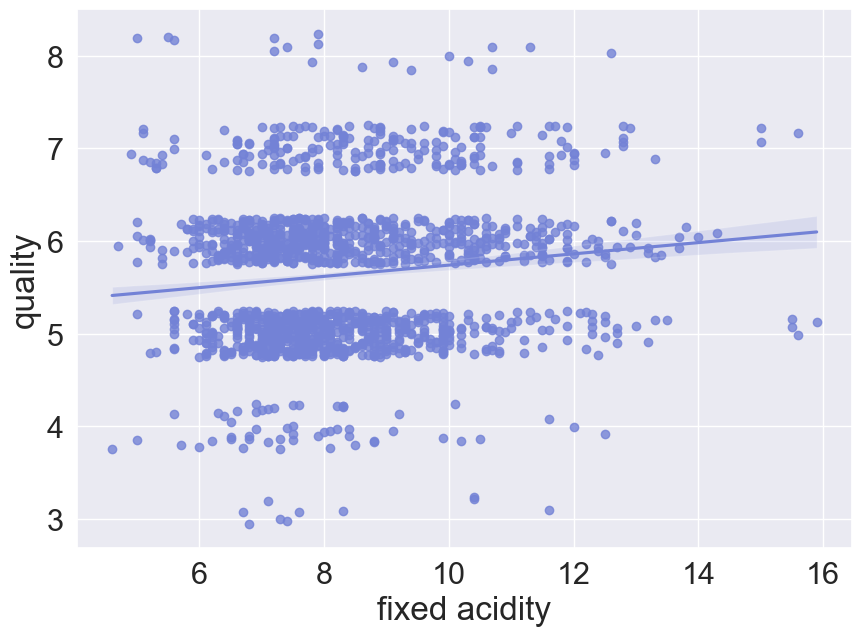

In [174]:
### PUT YOUR CODE HERE TO TRY AND MIMIC THE BELOW OUTPUT
# Create 11 regplots by using a for loop
for y_col in wine_df.columns:
    if y_col == "fixed acidity":
        continue
    # Create regplot with different y columns and colors
    sns.regplot(x = "fixed acidity", y = y_col, data = wine_df, color = np.random.rand(3))
    plt.show()

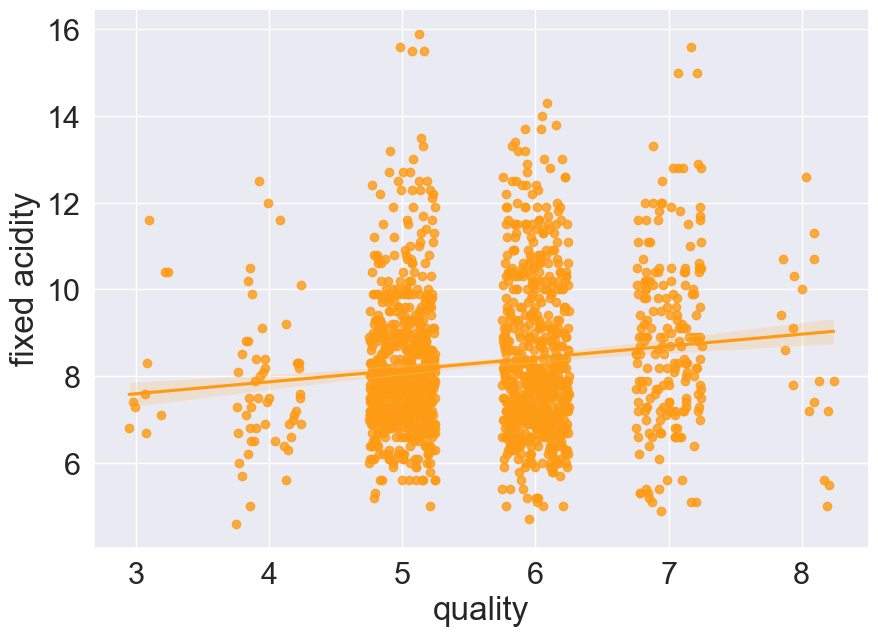

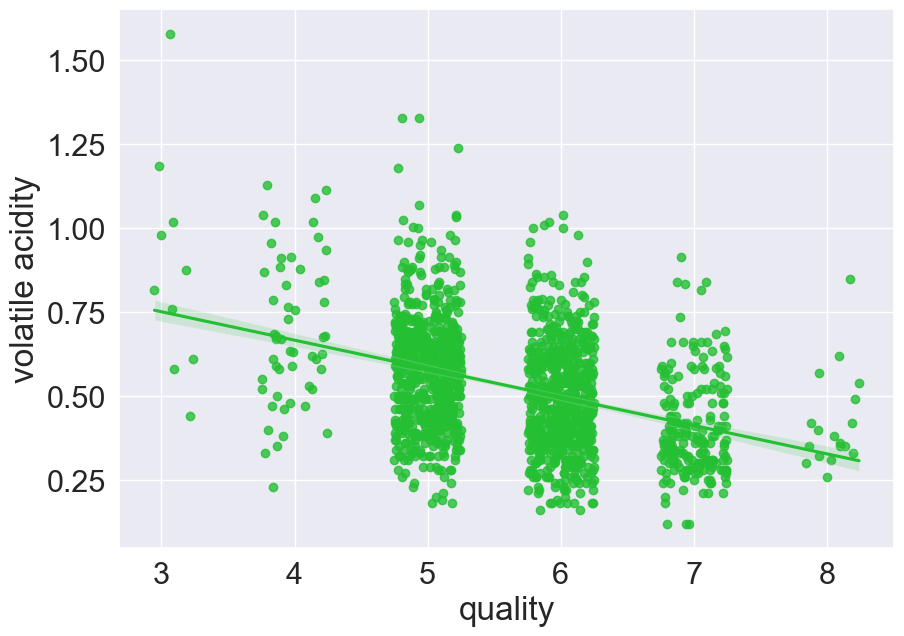

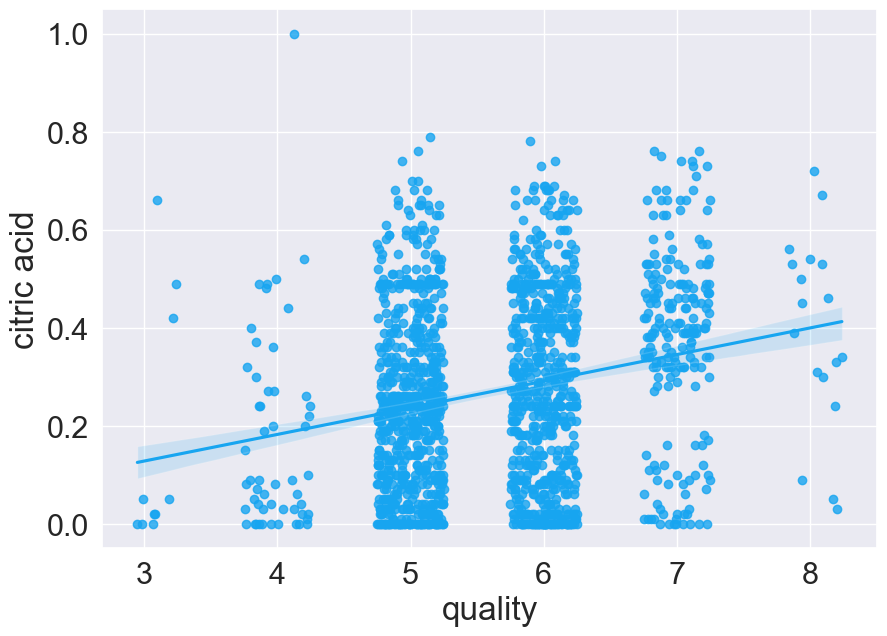

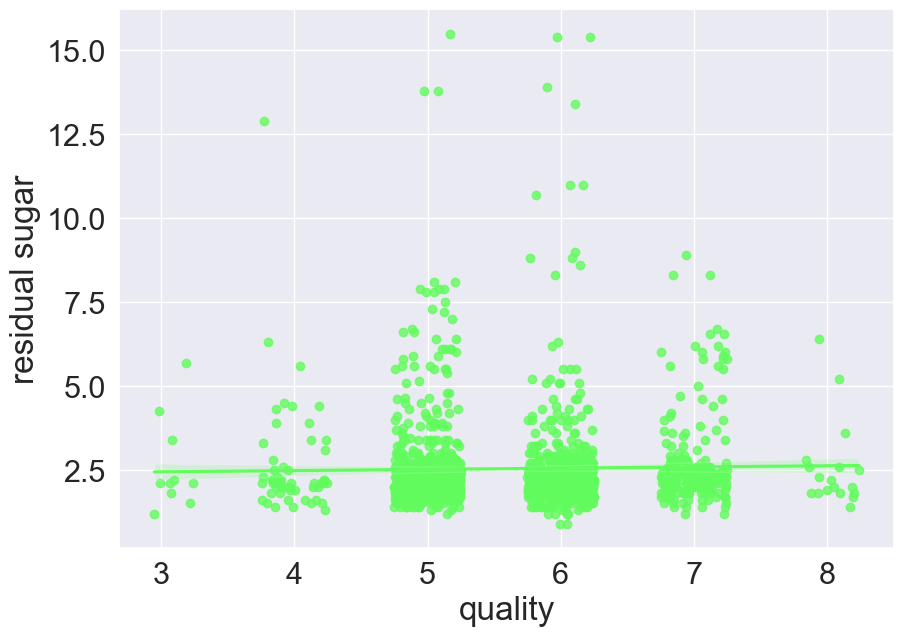

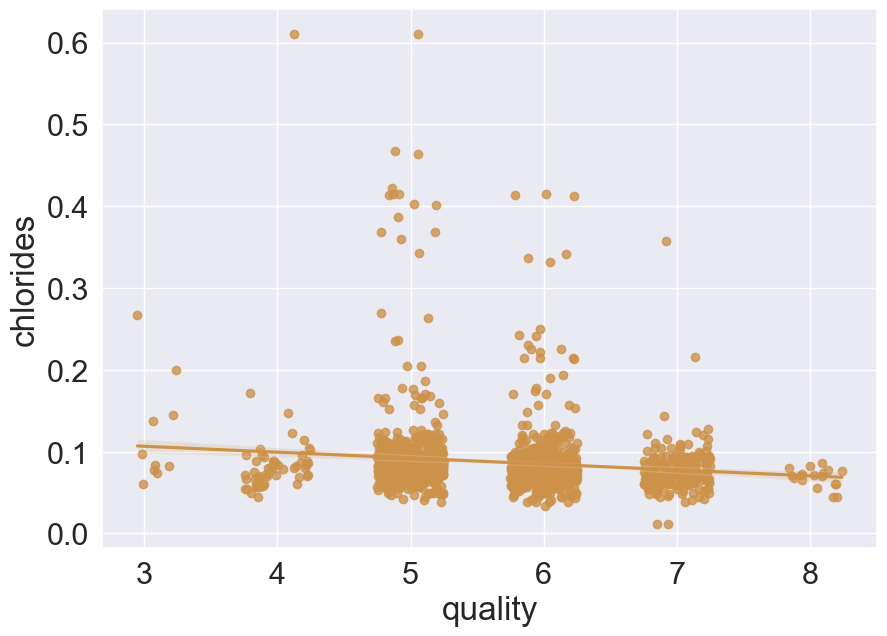

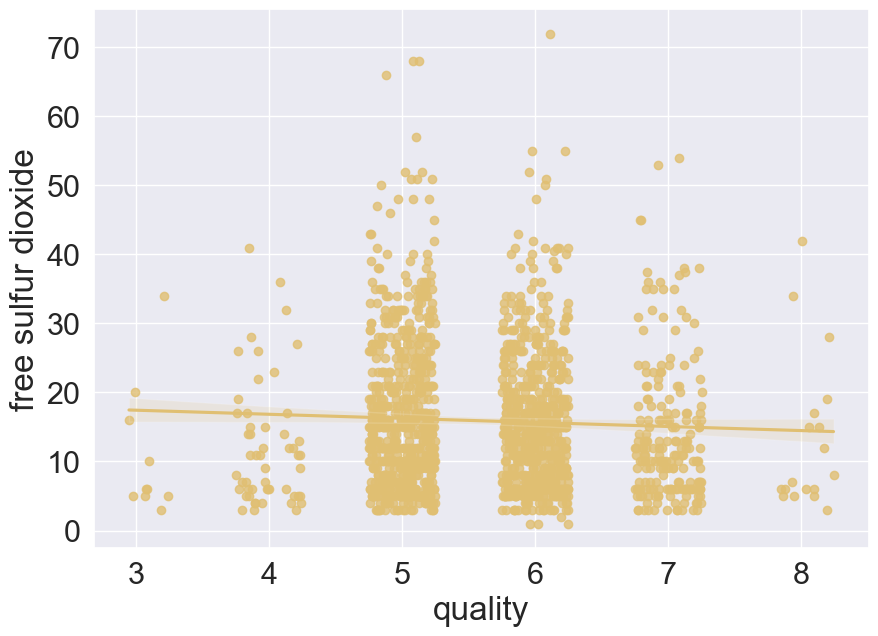

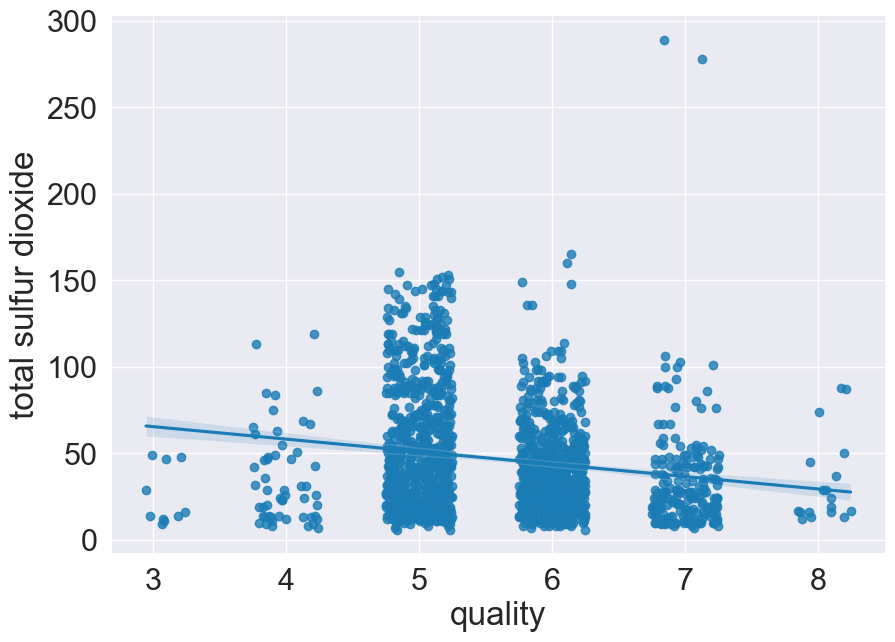

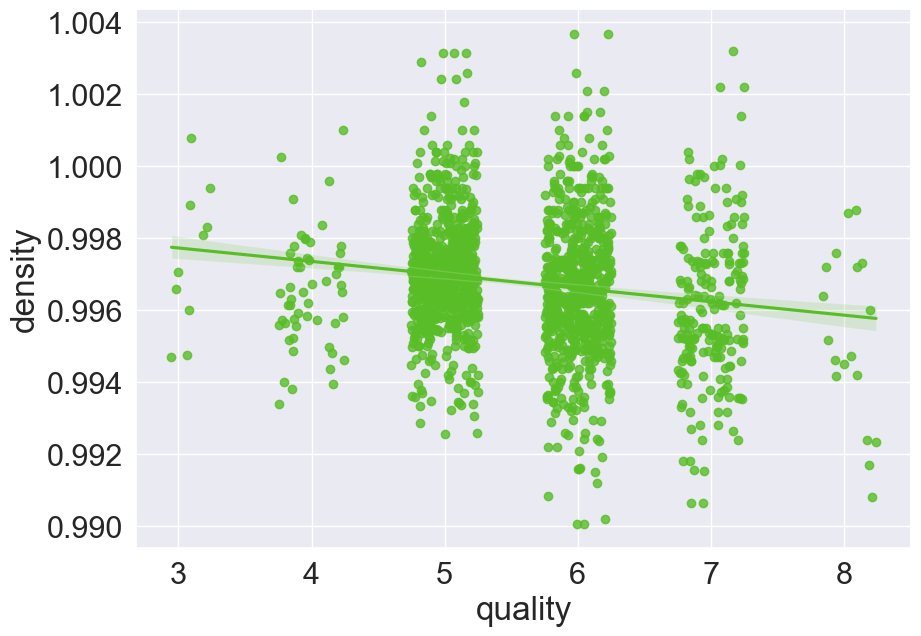

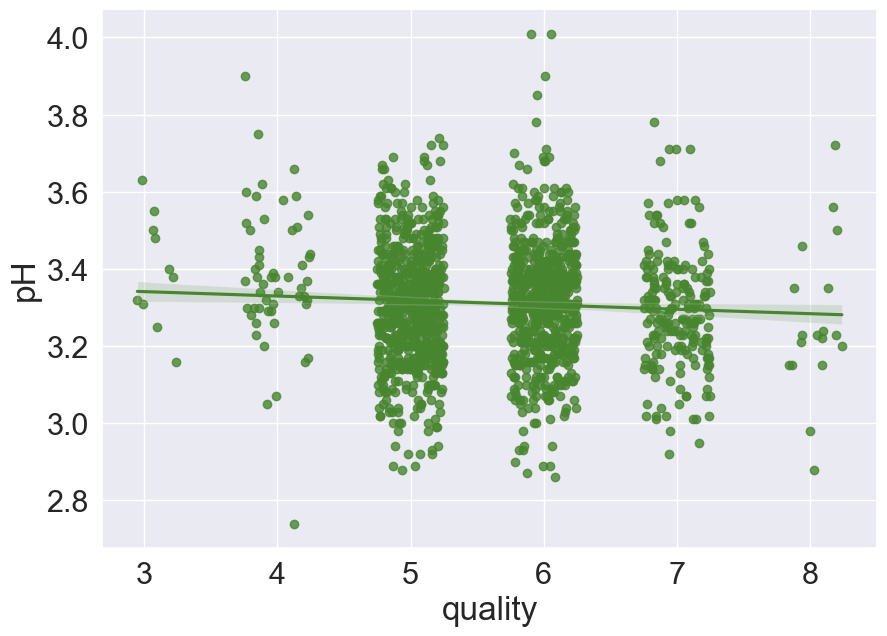

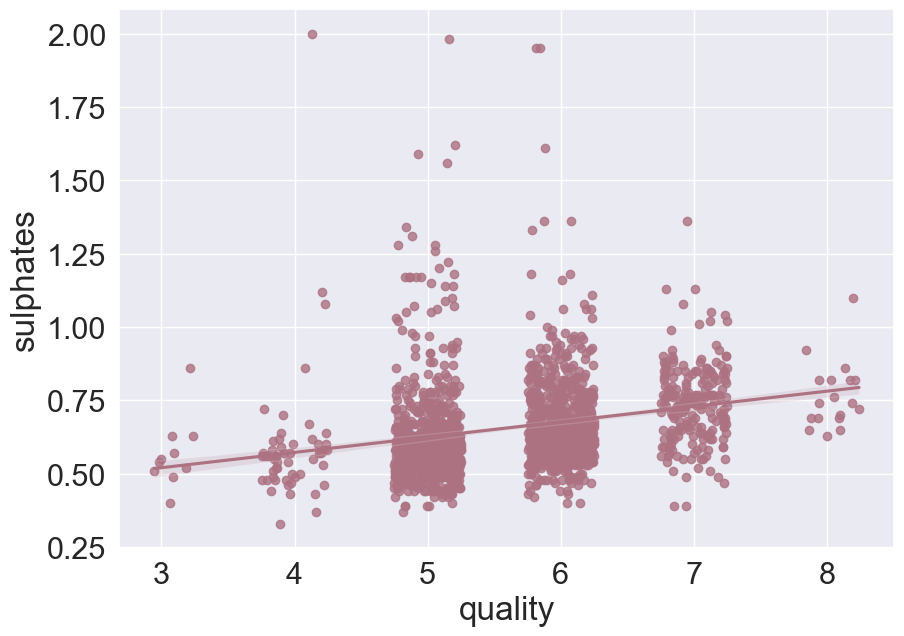

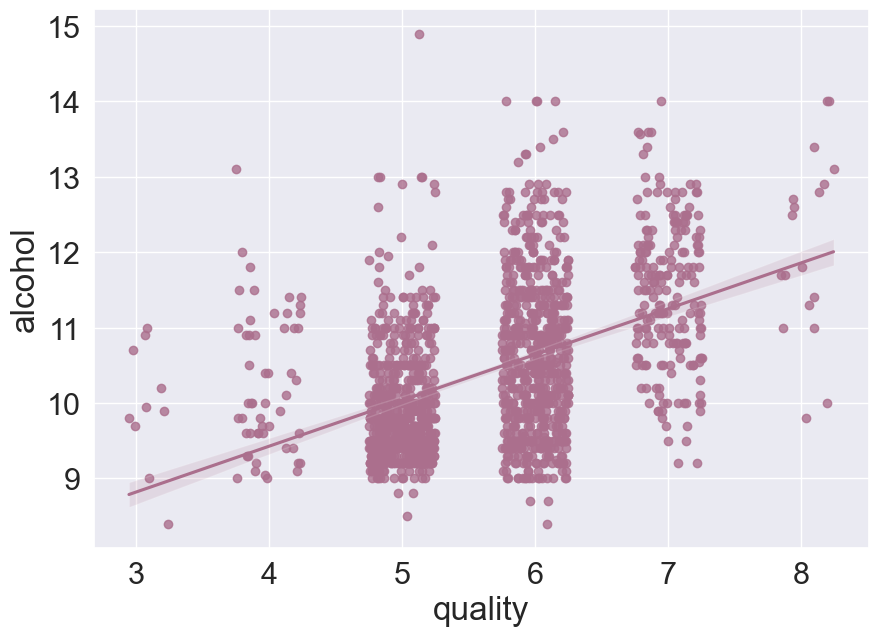

In [175]:
# According to Q2 "relationship with quality." So lets have "quality" our target variable
# Create 11 regplots by using a for loop
for y_col2 in wine_df.columns:
    if y_col2 == "quality":
        continue
    # Create regplot with different y columns and colors
    sns.regplot(x = "quality", y = y_col2, data = wine_df, color = np.random.rand(3))
    plt.show()

__Q2__: Is there anything that sticks out? What features seem to have the strongest relationship with quality?


Yes, according to my first 11 regplots, the scatterplot of fixed acidity vs. quality shows that the individual data points were divided into 6 rows. Unlike, other plots were scatter close together near to the regression line. Also, I see all plots show different strengh of the trend for each relationship of 2 variables. The scatterplot of fixed acidity vs. density have the strongest relationship. The scatterplot of fixed acidity vs. pH have the weakest relationship.

According to my second 11 regplots, alcohol seem to have the strongest relationship with quality.

__Q3__: How do these findings compare with your conclusions gathered from the correlation matrix?

From seeing the correlation matrix, a positive correlation between two variables will have a strong trend in scatterplot. A negative correlation between two variables will have a weak trend in scatterplot. For example, we know that alcohol seem to have the strongest relationship with quality from seeing the second 11 regplots that I created. Then going back to my correlation matrix, we can see that the highest correlation relationship with quality is alcohol which is 0.47.

### __Part 3. Data Cleaning and Preparation for Analysis__

Use Pandas to find if there are any missing values in the data set

In [176]:
### PUT YOUR CODE HERE
# call .info() and .isnull() to see any missing values in the data set
wine_df.info()
wine_df.isnull()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   float64
dtypes: float64(12)
memory usage: 150.0 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,False,False,False,False,False,False,False,False,False,False,False,False
1595,False,False,False,False,False,False,False,False,False,False,False,False
1596,False,False,False,False,False,False,False,False,False,False,False,False
1597,False,False,False,False,False,False,False,False,False,False,False,False


__Q4:__ If there were missing values, how do you think you would deal with them in this data set?





If the missing values are categorical variables then I would remove that specific column if I am dealing with a large dataset. Or I can also replace the missing values of that column with the most frequent. If the missing values are quantitative variables then I would impute the missing values of that column with the mean value. Both categorical and variables can also allow me to remove the column if its not important for our dataset or develop a model to predict missing values.

__Q5:__ Are there any categorical features in the data set? If so, which ones are they?

(HINT: Remember, Categorical variables are those whose numbers are representations of a certain category. For example, if there is a "Gender" feature, we might change all "male" values to 1 and all "female" values to 2. In this sense, the numbers don't have any real meaning, but are a way we can turn non-numerical attributes into numbers that we can then use in our models.)

No, there are no categorical features in the data set.

Using Pandas replace, encode any categorical variables accordingly. 

In [177]:
### PUT YOUR CODE HERE
# No code because there are no categorical variables

In order to run the models, we will create a Pandas dataframe `X`, containing the independent variables, and an array of the dependent variable, `y`. But before we do that, we should scale our data. 

However, what's the best way to scale?

First, let's create an `X_unscaled` Pandas dataframe from our `wine_df` dataframe. Then, create a `y_unscaled` Pandas series of the dependent variable, 'quality'.

In [178]:
### PUT YOUR CODE HERE TO TRY AND MIMIC THE BELOW OUTPUT
# Create X_unscaled and drop "quality" because it will be independent
X_unscaled = wine_df.drop("quality", axis = 1)

# Create y_unscaled and it will be dependent
y_unscaled = wine_df['quality']

# Print the X_unscaled Pandas DataFrame
print('X_unscaled columns:', list(X_unscaled.columns))

X_unscaled columns: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


Next, use Sci-Kit Learn's MinMaxScaler and StandardScaler (imported above) to create new sets of pandas dataframes from `X_unscaled`:
- `X_mm` (Using MinMaxScaler)
- `X_ss` (Using StandardScaler)

** The Scaler functions output 2D arrays, so you will need to turn them back into Pandas Dataframes, which can be passed directly to the Linear Regression function.

__Q6__: What statistical assumption does the Standard Scaler make about the data? Why might this be important?



The Standard Scaler relies on the assumption that features are normally distributed. The formula of Standard Scaler is where we substract the mean and then divide by the standard deviation (sd). Standard Scaler is important to keep our data normally distributed which it will not lead to inaccurate results.

__Q7__: What do you think the effect will be on using Linear Regression on differently scaled (or unscaled) data?

The effect on using Linear Regression on scaled might not be significant because the data might need to be normally distributed first before using the Linear Regression model. However, the performance of the Linear Regression on unscaled is effective if the data is already normally distributed or have similar values. 

In [179]:
### PUT YOUR CODE HERE TO TRY AND MIMIC THE BELOW OUTPUT
# Initialize StandardScaler()
s_scale = StandardScaler()

# Fitting X_unscaled 
X_ss = s_scale.fit_transform(X_unscaled)

# Create a new set of pandas DataFrame from X_unscaled
X_ss = pd.DataFrame(X_ss, columns = X_unscaled.columns)

# Call .head() to see the output
X_ss.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246


In [180]:
### PUT YOUR CODE HERE TO TRY AND MIMIC THE BELOW OUTPUT
# Initialize MinMaxScaler()
mm_scale = MinMaxScaler()

# Fitting X_unscaled
X_mm = mm_scale.fit_transform(X_unscaled)

# Create a new set of pandas DataFrame from X_unscaled
X_mm = pd.DataFrame(X_mm, columns = X_unscaled.columns)

# Call .head() to see the output
X_mm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846


Our final task before performing Linear Regression is to separate our data into training and testing sets. We have 3 different X dataframes, each with the same data but scaled differently:
- `X_unscaled`
- `X_ss`
- `X_mm`

Use Sci-Kit Learn's train_test_split function to create a training and testing set for each of the 3 data sets (Use `y_unscaled` for each of the data sets):
- `train_X_unscaled`, `train_y_unscaled`, `test_X_unscaled`, `test_y_unscaled`
- `train_X_ss`, `train_y_ss`, `test_X_ss`, `test_y_ss`
- `train_X_mm`, `train_y_mm`, `test_X_mm`, `test_y_mm`

Use a train/test split of 80/20

In [181]:
### PUT YOUR CODE HERE
# Create training and test set for X_unscaled
train_X_unscaled, test_X_unscaled, train_y_unscaled, test_y_unscaled = train_test_split(
    X_unscaled, y_unscaled, test_size = 0.2)

# Create training and test set for X_ss
train_X_ss, test_X_ss, train_y_ss, test_y_ss = train_test_split(
    X_ss, y_unscaled, test_size = 0.2)

# Create training and test set for X_mm
train_X_mm, test_X_mm, train_y_mm, test_y_mm = train_test_split(
    X_mm, y_unscaled, test_size = 0.2)


### __Part 4: Model Creation and Evaluation__

Now, we have 3 sets of data sets, and we will use each of them to do Linear Regression modelling. For *__each__* of the 3 data sets, do the following (the output of using unscaled data is below):

1. Create a Sci-kit Learn Linear Regression model, and train (fit) it on the training data.
2. Use this model to predict quality values for the corresponding test_X values, and save these test predictions as `predictions`.
3. Use `predictions` and `test_y` values to calculate `residuals`
4. Create a Seaborn scatter plot of the true quality vs. the predicted quality of the test set.
5. Create a Seaborn histogram of the residuals.
6. Print the $R^{2}$ value using the test values.

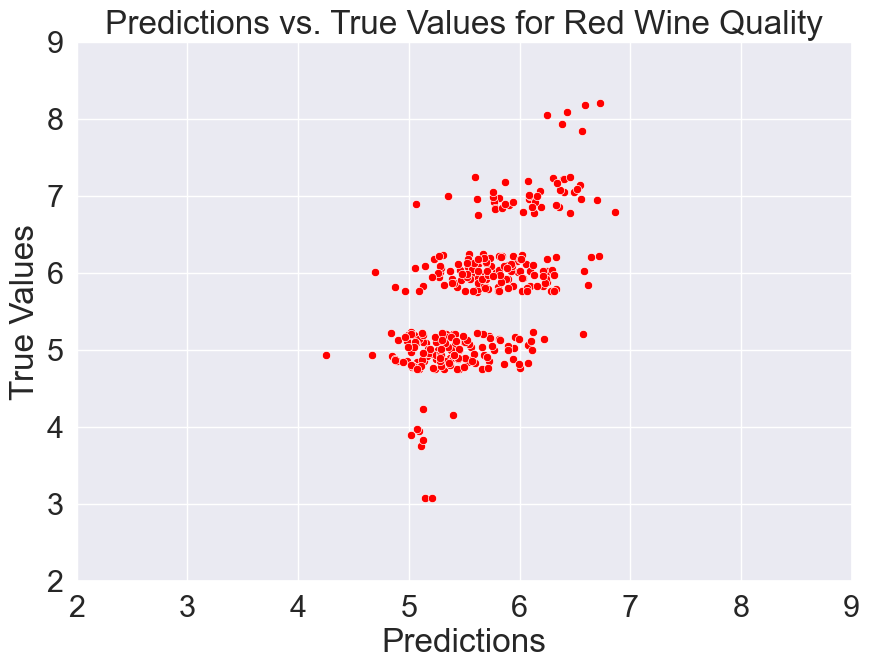

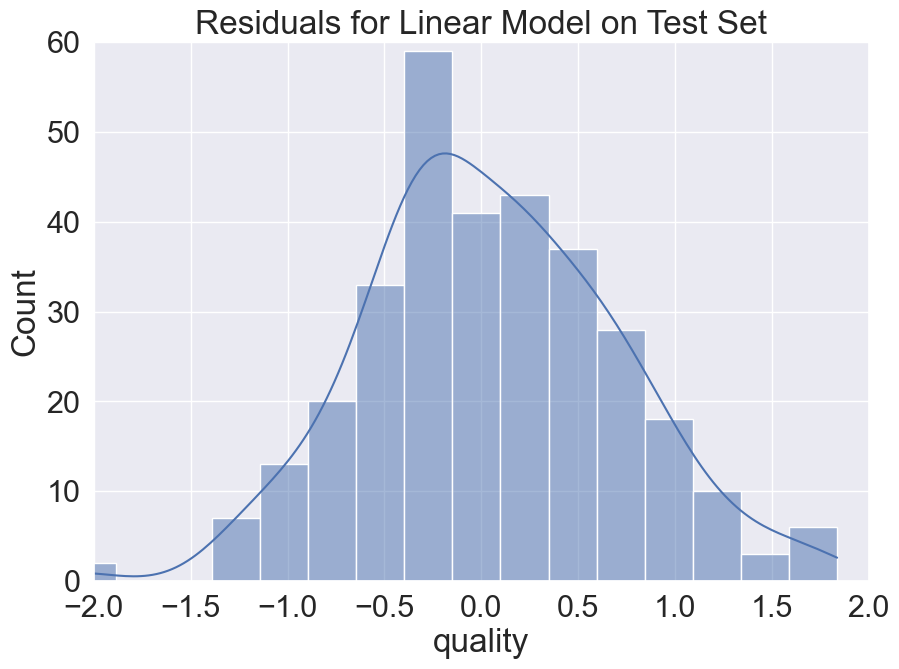

R-sqaured value:  0.38819916858300996


In [182]:
### PUT YOUR CODE HERE TO TRY AND MIMIC THE BELOW OUTPUT FOR UNSCALED DATA
# Create a Linear Regression model
lr = LinearRegression()

# Fit the model
lr.fit(train_X_unscaled, train_y_unscaled)

# Prediction
predictions = lr.predict(test_X_unscaled)

# Calculate the residuals
residuals = test_y_unscaled - predictions

# Create a scatterplot of true quality vs. predicted quality of the test set
sns.scatterplot(x = predictions, y = test_y_unscaled, color = 'red')
plt.title("Predictions vs. True Values for Red Wine Quality")
plt.xlabel("Predictions")
plt.ylabel("True Values")
plt.xlim(2, 9)
plt.ylim(2, 9)
plt.show()

# Create a histogram of the residuals
sns.histplot(residuals, kde = True)
plt.title("Residuals for Linear Model on Test Set")
plt.xlim(-2, 2)
plt.ylim(0, 60)
plt.show()

# Calculate and print the R2 score
# Importing metrics and r2_score from metrics
from sklearn import metrics
from sklearn.metrics import r2_score
print('R-sqaured value: ', r2_score(test_y_unscaled, predictions))

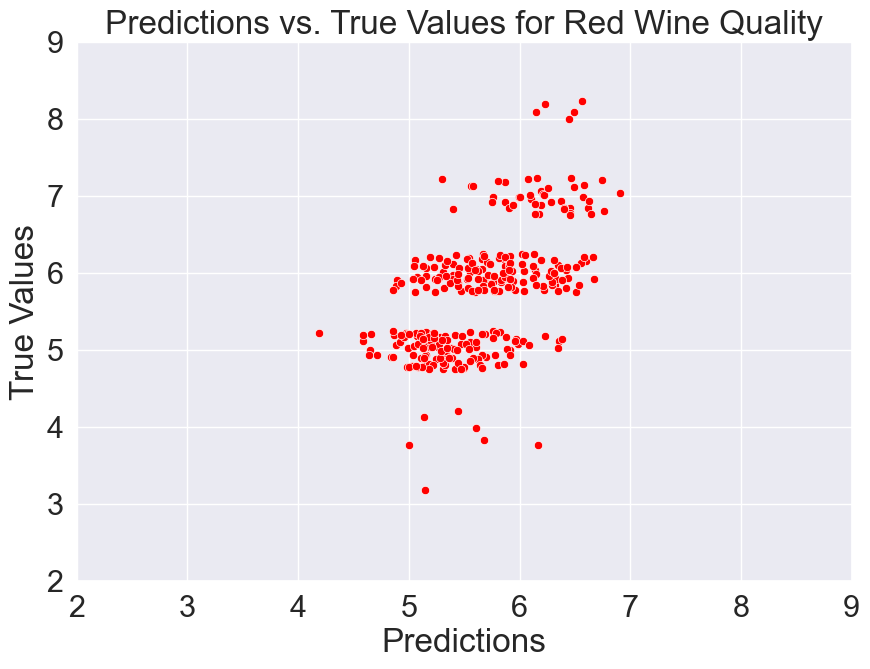

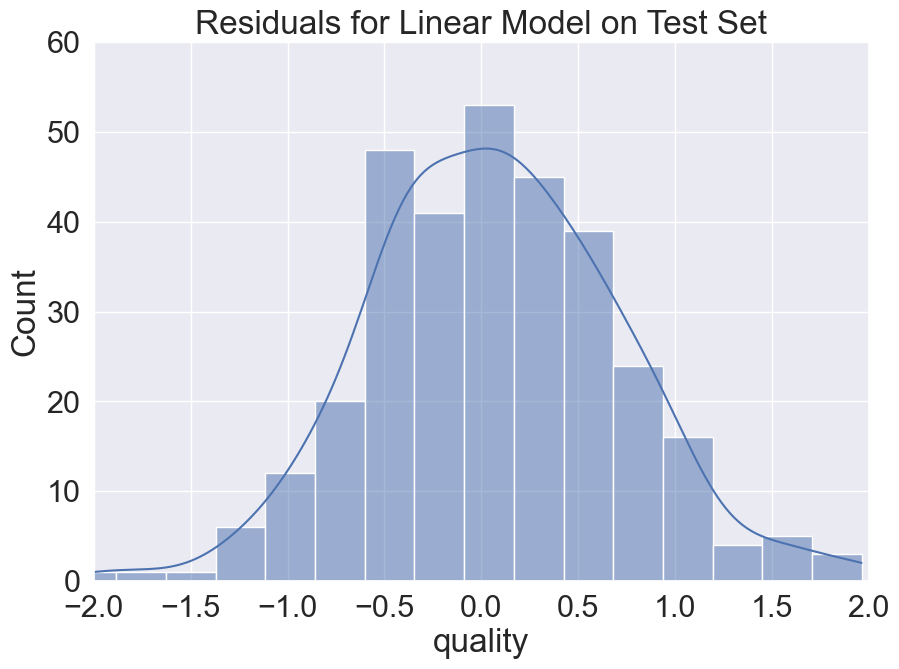

R-sqaured value:  0.30842916561969036


In [183]:
### PUT YOUR CODE HERE FOR MM SCALED DATA
# Create a Linear Regression model
lr_mm = LinearRegression()

# Fit the model
lr_mm.fit(train_X_mm, train_y_mm)

# Prediction
predictions_mm = lr_mm.predict(test_X_mm)

# Calculate the residuals
residuals_mm = test_y_mm - predictions_mm

# Create a scatterplot of true quality vs. predicted quality of the test set
sns.scatterplot(x = predictions_mm, y = test_y_mm, color = 'red')
plt.title("Predictions vs. True Values for Red Wine Quality")
plt.xlabel("Predictions")
plt.ylabel("True Values")
plt.xlim(2, 9)
plt.ylim(2, 9)
plt.show()

# Create a histogram of the residuals
sns.histplot(residuals_mm, kde = True)
plt.title("Residuals for Linear Model on Test Set")
plt.xlim(-2, 2)
plt.ylim(0, 60)
plt.show()

# Calculate and print the R2 score
print('R-sqaured value: ', r2_score(test_y_mm, predictions_mm))

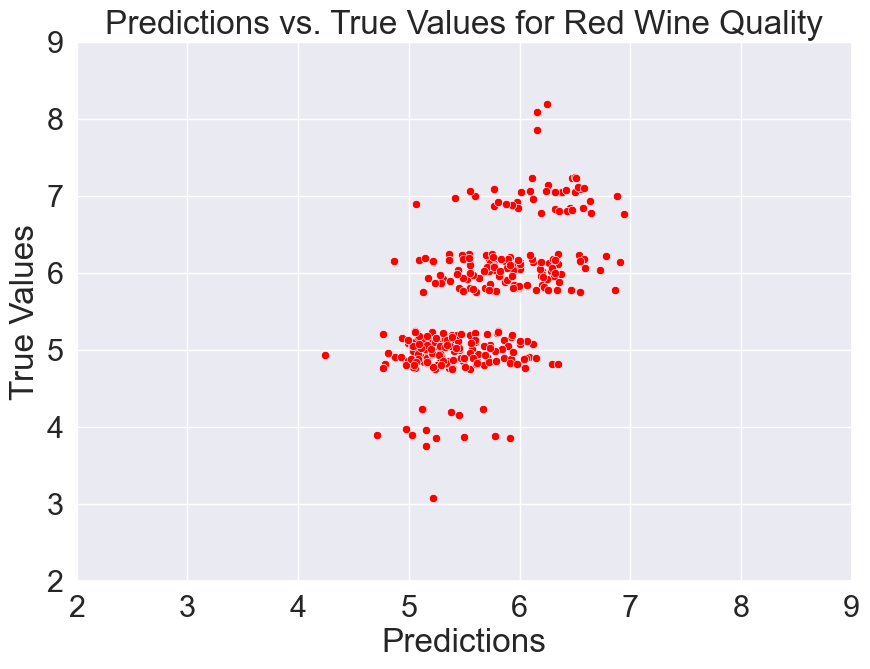

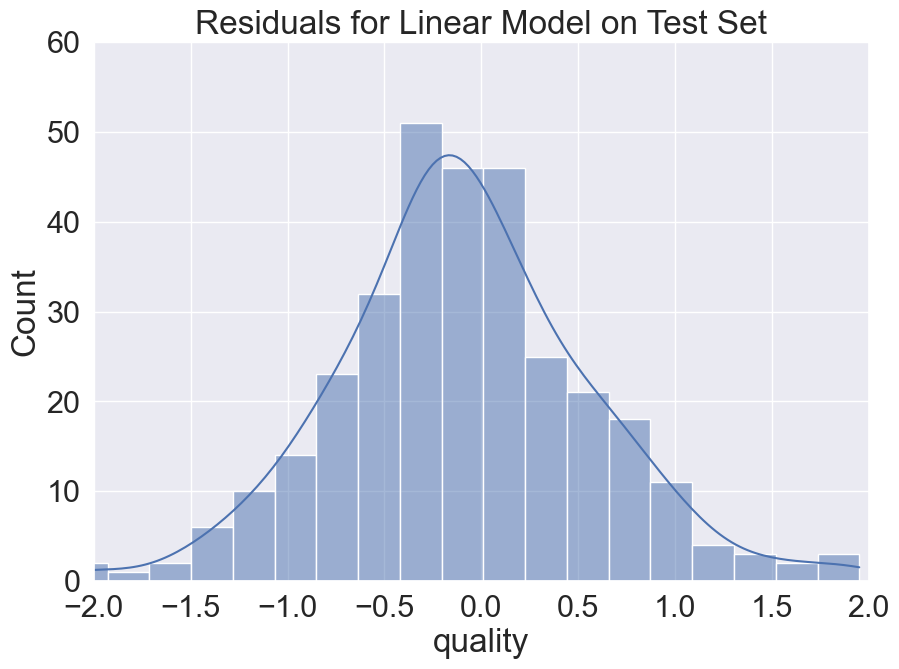

R-sqaured value:  0.3546310142482688


In [184]:
### PUT YOUR CODE HERE FOR SS SCALED DATA
# Create a Linear Regression model
lr_ss = LinearRegression()

# Fit the model
lr_ss.fit(train_X_ss, train_y_ss)

# Prediction
predictions_ss = lr_ss.predict(test_X_ss)

# Calculate the residuals
residuals_ss = test_y_ss - predictions_ss

# Create a scatterplot of true quality vs. predicted quality of the test set
sns.scatterplot(x = predictions_ss, y = test_y_ss, color = 'red')
plt.title("Predictions vs. True Values for Red Wine Quality")
plt.xlabel("Predictions")
plt.ylabel("True Values")
plt.xlim(2, 9)
plt.ylim(2, 9)
plt.show()

# Create a histogram of the residuals
sns.histplot(residuals_ss, kde = True)
plt.title("Residuals for Linear Model on Test Set")
plt.xlim(-2, 2)
plt.ylim(0, 60)
plt.show()

# Calculate and print the R2 score
# Importing metrics and r2_score from metrics
from sklearn import metrics
from sklearn.metrics import r2_score
print('R-sqaured value: ', r2_score(test_y_ss, predictions_ss))

Finally, create a dataframe with all of the coefficients from each of the 3 models and compare.

In [185]:
### PUT YOUR CODE HERE TO TRY AND MIMIC THE BELOW OUTPUT
# Create a pandas DataFrame with all of the coef from each 3 models 
wine_df_coefs = pd.DataFrame({'features': X_unscaled.columns, 'Unscaled': lr.coef_,
                              'StdScaler': lr_ss.coef_, 'MinMaxScaler': lr_mm.coef_})

# Print and compare
wine_df_coefs

,features,Unscaled,StdScaler,MinMaxScaler
0,fixed acidity,0.023139,0.045925,0.450710
1,volatile acidity,-1.106238,-0.214838,-1.769019
2,citric acid,-0.290853,-0.044605,-0.278777
3,residual sugar,0.018504,0.027707,0.542436
4,chlorides,-1.924001,-0.081780,-1.036613
5,free sulfur dioxide,0.004683,0.051324,0.269411
6,total sulfur dioxide,-0.003279,-0.105473,-0.906130
7,density,-7.449077,-0.043369,-0.281694
8,pH,-0.500333,-0.066826,-0.468387
9,sulphates,0.947142,0.145426,1.600051


__Q8__: As is often the case when working on real-world issues, the models may not necessarily fit perfectly. In these models, the $R^2$ values are relatively small. What does the $R^2$ value represent for our models?






Usually a good r-sqaured values are over 0.7, but we have around 0.3 ish which is very weak. The r-sqaured value represent the goodness of fit between the data and the regression model.

__Q9__: In your estimation, which model performed the best, and why?

After running my codes for multiple of times and the linear regression model with unscaled data performed the best because it has the highest r-sqaured value which is 0.388. 

__Q10__: We saw that the use of differing standardizing techniques produced different results, with different coefficients and different $R^2$ values. Why do you think this is?


I do believe that the use of differing standardizing techniques produced different results because they all have a different role of scale change and handling data with normally distribution.

__Report__


The most important part of any data science project is interpretting and communicating the results to the appropriate stakeholder, whether that be a boss, client, or another team member. Given all of the analysis you've done so far, write a short report (2 - 3 paragraphs) summarizing the analysis you did, the results, and the conclusions you came to, supporting your conclusions with your analysis. Feel free to do any more analysis you wish or to modify code you've already used. Curiosity is often rewarded!

I looked at The Wine Company's data collected different characterisitics about their different wines over the years. They need help for wanting to know how these variables impact a wine's quality rating. So, I load the data file into a pandas DataFrame. From here, I observe the data by using .head(), .info(), and .describe() to get a sense of the data. Then I create a correlation matrix of the data using a heatmap. This is where I can see the every relationship between two variables and to check if theres any severe collinearity. Therefore, there is no severe collinearity and there are 3 relationship that are 0.67. Then, I create two 11 regplots, one targets "fixed acidity" and the other targets "quality". These regplots will help me to observe the strength of the trends for each plots. As a result, Alcohol seem to have the strongest relationship with quality.

Before I scaling my data. I checked the data set to make sure if there are any missing values. Therefore, no missing values in the data set. This data set does not have any categorical features which I can skip the "pandas replace, encode any categorical variables" step. Finally, I can create two pandas DataFrame, X, containing the independent variables, and y, an array of the dependent variable. So, I created "X_unscaled" DataFrame of the wine data and dropped "quality" column, and for y I created "y_unscaled" DataFrame of "quality". Now I begin using MinMaxScaler and StandardScaler in two seperate pandas DataFrame. Overall, the MinMaxScaler seem to have a higher value than StandardScaler. I split the data into training and testing for 3 different X dataframes which are X_unscaled, X_ss (StandardScaler), and X_mm (MinMaxScaler). However, I used a train/test split of 80/20.

For the model creation, I am using a Linear Regression for each of the three data sets. I train fit the train_x and train_y data into the Linear Regression model. Using this model to predict the quality values for test_X values. Now, I can display the scatterplot of the true quality values vs. the predicted quality of the test values. I calculate the residuals by predictions from test_y then I display a histogram to see the distributions. Finally, I calculate the r-squared value using the test values. I repeat these steps for MinMaxScaler and StandardScaler. As a result, the r-squared values from these models are relatively small because they were around 0.3. The highest r-sqaured value is 0.325 which from using the standard scaler on linear regression model. I think I could slightly improve the results by using train/test split 85/15. However, if it overfits the model then I probably could try using some non-linear models. 